# Step 1: Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Setting up random seed with ATU ID

In [4]:
RANDOM_SEED = 402138
np.random.seed(RANDOM_SEED)

# Step 3 Loading required files

In [6]:
# Load feature names
with open ("features.txt", "r") as f:
    feature_names = [line.strip() for line in f.readlines()]

In [7]:
# Load the dataset
data = np.loadtxt("dataset.txt")
data = pd.DataFrame(data, columns=feature_names)

In [8]:
# Load the target labels
y = np.loadtxt("targets.txt").astype(int)

# Step 4: Explore the data

In [10]:
print("Dataset Shape:", data.shape)
print("Missing Values:")
print(data.isnull().sum())
print("Class Distribution:")
print(pd.Series(y).value_counts())

Dataset Shape: (10299, 561)
Missing Values:
1 tBodyAcc-mean()-X                         0
2 tBodyAcc-mean()-Y                         0
3 tBodyAcc-mean()-Z                         0
4 tBodyAcc-std()-X                          0
5 tBodyAcc-std()-Y                          0
                                           ..
557 angle(tBodyGyroMean,gravityMean)        0
558 angle(tBodyGyroJerkMean,gravityMean)    0
559 angle(X,gravityMean)                    0
560 angle(Y,gravityMean)                    0
561 angle(Z,gravityMean)                    0
Length: 561, dtype: int64
Class Distribution:
6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: count, dtype: int64


# Step 5: Seeing the Class Distribution


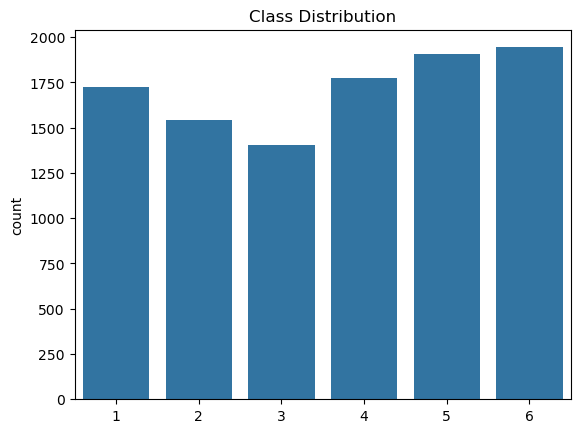

In [12]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


# Step 6: Starting the data Processing

In [14]:
X = data

In [15]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 7: Splitting the data into test and train using train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED
                                                   )

# Step 8: Normalise features

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 9: Apply PCA for Dimensionality Reduction


In [21]:
# Apply PCA to reduce dimensionality while keeping 95% variance
pca = PCA(n_components=0.95, random_state=RANDOM_SEED)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [22]:
# Print explained variance ratio
print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))
print("Reduced Dimensions:", X_train_pca.shape[1])

Explained Variance Ratio: 0.950007110811095
Reduced Dimensions: 103


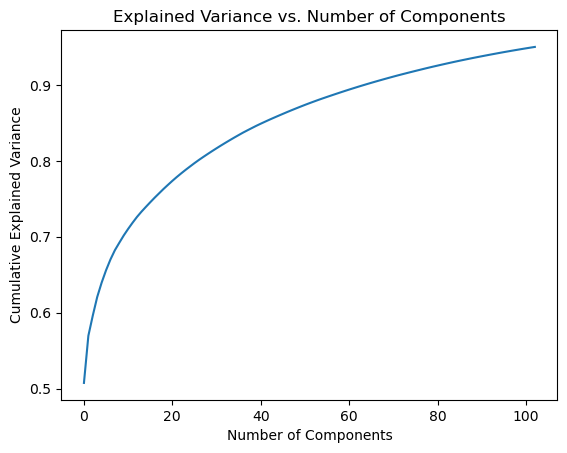

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()


# Step 10: Train model with PCA reduced data

In [25]:
# Train Logistic Regression model
log_model = LogisticRegression(random_state=RANDOM_SEED, max_iter=500)
log_model.fit(X_train_pca, y_train)


LogisticRegression(max_iter=500, random_state=402138)

# Step 11: Make predictions

In [27]:
y_pred = log_model.predict(X_test_pca)


# Step 12: Evaluate model performance

In [29]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9660194174757282
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       340
           1       0.98      0.99      0.99       307
           2       0.98      0.98      0.98       289
           3       0.91      0.92      0.92       346
           4       0.93      0.92      0.93       398
           5       1.00      1.00      1.00       380

    accuracy                           0.97      2060
   macro avg       0.97      0.97      0.97      2060
weighted avg       0.97      0.97      0.97      2060



In [30]:
#Step 13: Confusion Matrix

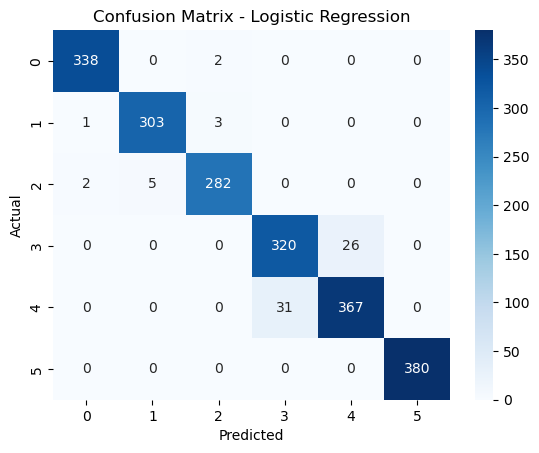

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Step 14: Cross-validation scores

In [33]:
# Cross-validation
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5)
print("Cross-validation Accuracy:", np.mean(cv_scores))

Cross-validation Accuracy: 0.9826437152575144


In [34]:
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.9660


In [35]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       340
           1       0.98      0.99      0.99       307
           2       0.98      0.98      0.98       289
           3       0.91      0.92      0.92       346
           4       0.93      0.92      0.93       398
           5       1.00      1.00      1.00       380

    accuracy                           0.97      2060
   macro avg       0.97      0.97      0.97      2060
weighted avg       0.97      0.97      0.97      2060



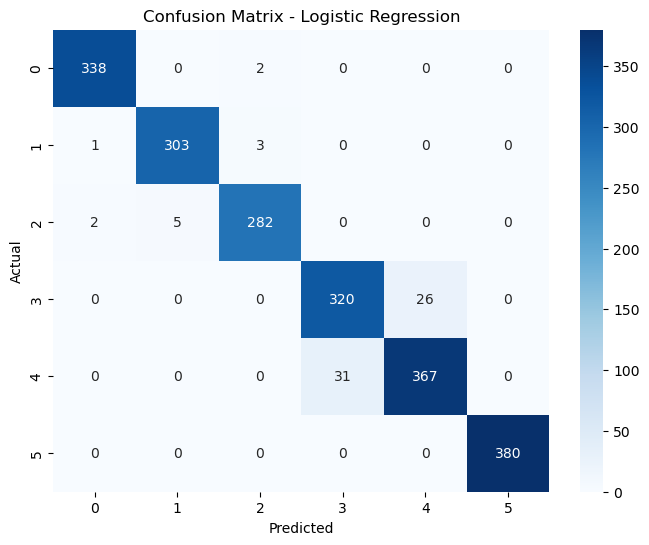

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest Model 

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=402138)

In [39]:
y_pred_rf = rf_model.predict(X_test_pca)

In [40]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy with PCA: ", accuracy_rf)
print("Classification report: ")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy with PCA:  0.9427184466019417
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       340
           1       0.94      0.93      0.94       307
           2       0.96      0.95      0.95       289
           3       0.90      0.89      0.89       346
           4       0.92      0.91      0.91       398
           5       0.99      1.00      0.99       380

    accuracy                           0.94      2060
   macro avg       0.94      0.94      0.94      2060
weighted avg       0.94      0.94      0.94      2060



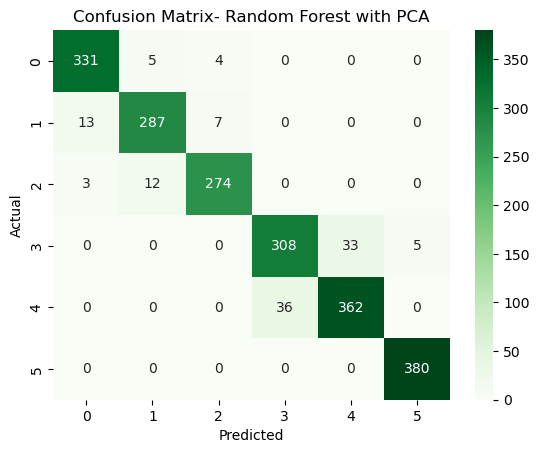

In [41]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap ='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix- Random Forest with PCA")
plt.show()

In [42]:
cv_scores_rf = cross_val_score(rf_model, X_train_pca, y_train, cv=5)
print("Cross-Validation accuracy with PCA (Random Forest):", np.mean(cv_scores_rf))

Cross-Validation accuracy with PCA (Random Forest): 0.9347014430473767


# KNN

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [56]:
y_pred_knn = knn_model.predict(X_test_pca)


In [60]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("kNN Accuracy with PCA: ", accuracy_knn)
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn))

kNN Accuracy with PCA:  0.9606796116504854
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       340
           1       0.98      0.99      0.99       307
           2       0.99      0.98      0.98       289
           3       0.93      0.87      0.90       346
           4       0.89      0.94      0.92       398
           5       0.99      0.99      0.99       380

    accuracy                           0.96      2060
   macro avg       0.96      0.96      0.96      2060
weighted avg       0.96      0.96      0.96      2060



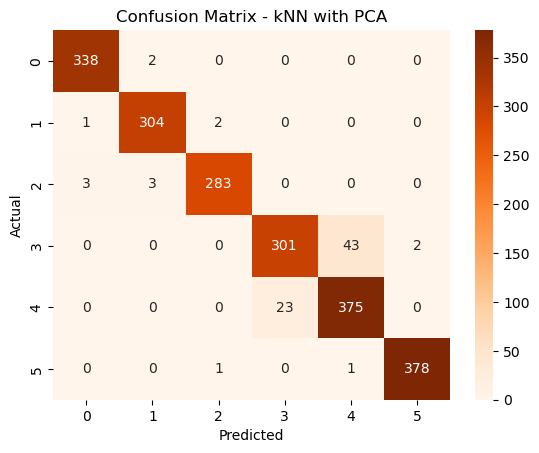

In [62]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - kNN with PCA")
plt.show()

In [64]:
cv_scores_knn = cross_val_score(knn_model, X_train_pca, y_train, cv=5)
print("Cross-Validation accuracy with PCA (kNN):", np.mean(cv_scores_knn))

Cross-Validation accuracy with PCA (kNN): 0.9530287489463042
